# Comparing the power-law collision kernels with the fractional Laplacian. 

In [1]:
include("collisionkernels.jl")
using .CollisionKernels

include("subordinate.jl")
using .Subordinate

using Plots
Threads.nthreads()

10

In [2]:
# P is the number of points used in the sample of the subordinate kernel
# The subordinate kernel will be compared with the collision kernel at P equidistant points between 0 and π/2
P = 30
@time a,m = pre_sample(P);

 10.995303 seconds (429.83 M allocations: 8.367 GiB, 6.01% gc time, 28.65% compilation time)


In [3]:
νs = vcat(Vector(1.:0.1:1.9),Vector(1.91:0.01:1.95))
ω(t,ν) = 1/sqrt(1+(2-ν)^(1/2)*t)
@time s1 = sample_fractional_laplacian(νs,a,m);

  0.361976 seconds (3.47 M allocations: 98.855 MiB, 333.89% compilation time)


Let $b_{col}(\theta)$ be the collision kernel corresponding to a power-law repulsive force with exponent $q$. These kernels are known to have the following behavior for small angles.
$$ b_{col}(\theta) = C_q \theta^{-2-\nu}. $$
The exact formula for $b_{col}$ is not explicit. We want to compare it with a kernel $b_{sub}$ of the form
$$ b_{sub}(\theta) = \int_0^\infty \omega(t) h_t(\theta).$$
Here $h_t$ is the heat kernel centered at the north pole $\theta=0$. The weight $\omega(t)$ is an arbitrary weight function. We proved that for any such kernel $b_{sub}$, the inequality (1.4) in our paper holds with constant $\Lambda_{sub} = \min(2\Lambda_{local},2d)$, which is equal to 6 in dimension three.

We want to apply the followig fact. If for any weight $\omega \geq 0$, we find two constants $c_1$ and $C_2$ such that
$$c_1 (b_{sub}(\theta) + b_{sub}(\pi-\theta)) \leq (b_{col}(\theta)+b_{col}(\pi-\theta)) \leq C_2 (b_{sub}(\theta) + b_{sub}(\pi-\theta)),$$
then the inequality (1.4) holds for $b_{col}$ with parameter $C_2/c_1 \cdot 6$.

The plan is to compute $b_{col}$ and $b_{sub}$ numerically using the weight 
$$ \omega(t) := \frac{t^{-1-\nu/2}}{\sqrt{1+(2-ν)^{1/2}t}}.$$
We then estimate the value of $C_2/c_1$ for a collection of values of $\nu \in [1,2]$.

We get the following results.

In [4]:
for m in 1:length(νs)
    ν = νs[m]
    cν = Cnu(ν)
    qf = qofν(ν)
    cfq = Cq(qf)

    min = 1.
    max = 1.
    for i in 2:P
        θ = (1+i)/(P+1) * π/2
        ratio = s1[m,i] / cν / symb(θ,qf) * cfq
        if ratio<min
            min = ratio
        end
        if ratio>max
            max = ratio
        end
    end
    println("ν= ",ν,"   max ratio:",max/min)
end

ν= 1.0   max ratio:1.5726773827356186
ν= 1.1   max ratio:1.556921794130688
ν= 1.2   max ratio:1.530950025407577
ν= 1.3   max ratio:1.4956511200267886
ν= 1.4   max ratio:1.4520746024268212
ν= 1.5   max ratio:1.4012609812993277
ν= 1.6   max ratio:1.344378601110756
ν= 1.7   max ratio:1.2825755076092145
ν= 1.8   max ratio:1.2169652386673955
ν= 1.9   max ratio:1.1486837388412183
ν= 1.91   max ratio:1.1417581458012869
ν= 1.92   max ratio:1.1347977208345885
ν= 1.93   max ratio:1.127827712499131
ν= 1.94   max ratio:1.1208430686569348
ν= 1.95   max ratio:1.1138737739088336


It is not completely clear why the ratio of $C_1/c_1$ starts to deteriorate when $\nu$ is very close to $2$. It may easily be due to numerical error from the singularity of the kernel by the origin becoming too steep.

In [5]:
function draw_nice_pic(focus::Integer)
    @assert 1 <= focus <= size(s1)[1]
    println("ν = ",νs[focus])
    q = qofν(νs[focus])
    cq = Cq(q)
    cν = Cnu(νs[focus])
    θr = range(π/(P+1),π/2,length=P)
    θrange = range(π/(P+1),π/2,length=100)
    brange = map(θ->symb(θ,q),θrange)
    srange = cq/cν * s1[focus,:]
    p2=plot(θr,(srange),label="b_{fl}", yaxis=:log)
    p2 = plot!(θrange,(brange),label="b_{col}", yaxis=:log)
    display(p2)
    println("Graph for ν=", νs[focus]," in logarithmic scale")
end

draw_nice_pic (generic function with 1 method)

We will now draw some graphs to show how $b_{col}$ and $b_{sub}$ resemble each other. 

We renormalize $b_{sub}$ so that it has the same asymptotic behavior as $b_{col}$ at $\theta = 0$.

The blue line corresponds to the kernel $b_{sub}$ renormalized. The red line is the kernel $b_{col}$. In most of the graphs the lines are one of top of the other. We can barely recognize there are two distinct curves.

The graphs are in logarithmic scale.

ν = 1.0


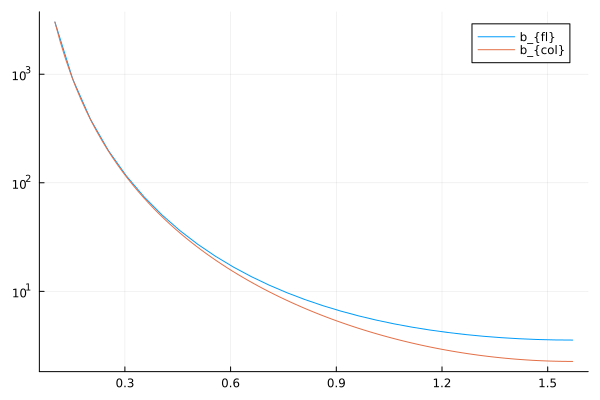

Graph for ν=1.0 in logarithmic scale


In [6]:
draw_nice_pic(1)

ν = 1.3


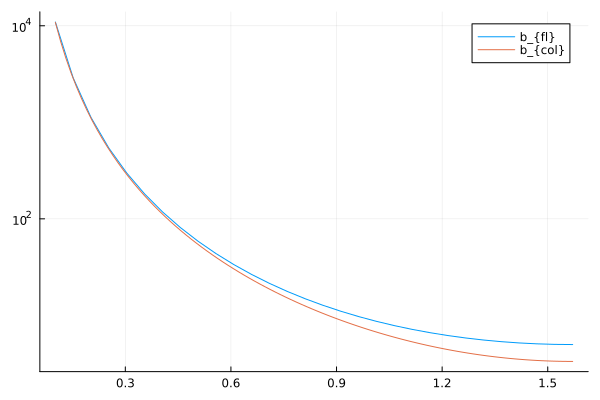

Graph for ν=1.3 in logarithmic scale


In [7]:
draw_nice_pic(4)

ν = 1.6


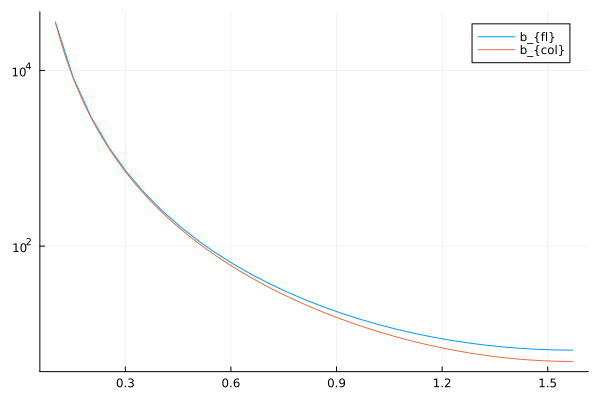

Graph for ν=1.6 in logarithmic scale


In [8]:
draw_nice_pic(7)

ν = 1.9


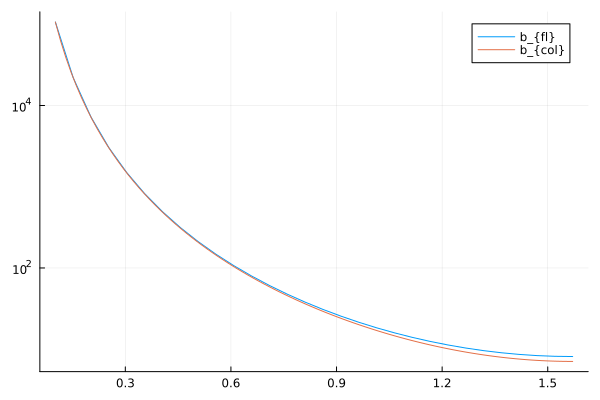

Graph for ν=1.9 in logarithmic scale


In [9]:
draw_nice_pic(10)

ν = 1.95


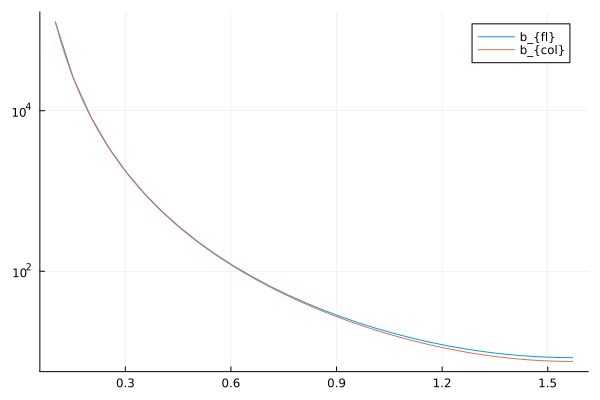

Graph for ν=1.95 in logarithmic scale


In [10]:
draw_nice_pic(15)